# Comparación de Técnicas de Reducción de Dimensionalidad: PCA vs t-SNE vs UMAP

Este notebook analiza tres técnicas populares de reducción de dimensionalidad utilizando el dataset MNIST (imágenes de dígitos manuscritos).

- **PCA (Análisis de Componentes Principales)**
- **t-SNE (t-distributed Stochastic Neighbor Embedding)**
- **UMAP (Uniform Manifold Approximation and Projection)**

Se comparan tanto cualitativa como cuantitativamente, con un análisis de hiperparámetros óptimos para cada técnica.

In [9]:
# Instalación (si estás en Colab o entorno limpio)
!pip install umap-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import time

## 1. Cargar el dataset MNIST y preprocesamiento

In [24]:
# Cargamos el dataset MNIST desde OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data']
y = mnist['target'].astype(int)

# Tomamos una muestra aleatoria de 2000 imágenes (por velocidad de visualización)
np.random.seed(42)
sample_idx = np.random.choice(len(X), 2000, replace=False)
X_sample = X[sample_idx]
y_sample = y[sample_idx]

# Escalamos los datos (importante para PCA y UMAP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

In [25]:
X_scaled.shape

(2000, 784)

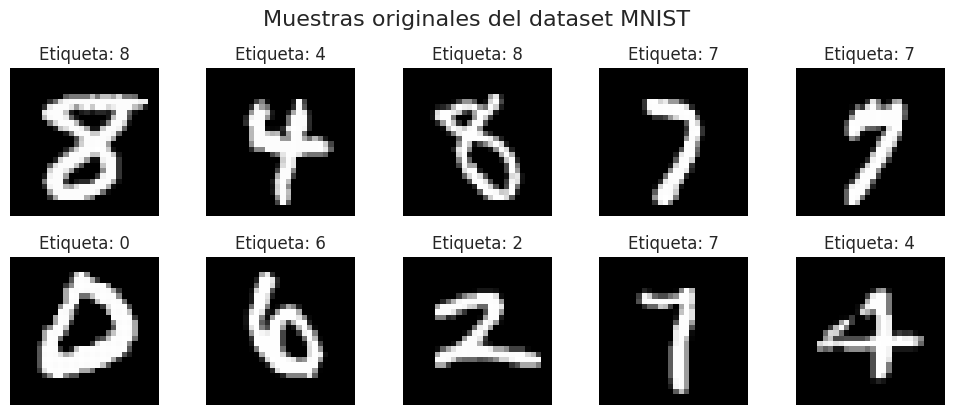

In [26]:
# Función para mostrar una grilla de imágenes
def plot_sample_images(X, y, n=10):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Etiqueta: {y[i]}")
        plt.axis('off')
    plt.suptitle("Muestras originales del dataset MNIST", fontsize=16)
    plt.tight_layout()
    plt.show()

# Llamamos a la función con X_sample
plot_sample_images(X_sample, y_sample)

## 2. Aplicación de PCA, t-SNE y UMAP con parámetros estándar

Documentación t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Documentación UMAP: https://umap-learn.readthedocs.io/en/latest/parameters.html

In [27]:
# PCA
start = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA completado en {time.time() - start:.2f} segundos")

# t-SNE
start1 = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
print(f"t-SNE completado en {time.time() - start1:.2f} segundos")

# UMAP
start2 = time.time()
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
print(f"UMAP completado en {time.time() - start2:.2f} segundos")

PCA completado en 0.12 segundos
t-SNE completado en 19.30 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completado en 6.38 segundos


## 3. Visualización de resultados

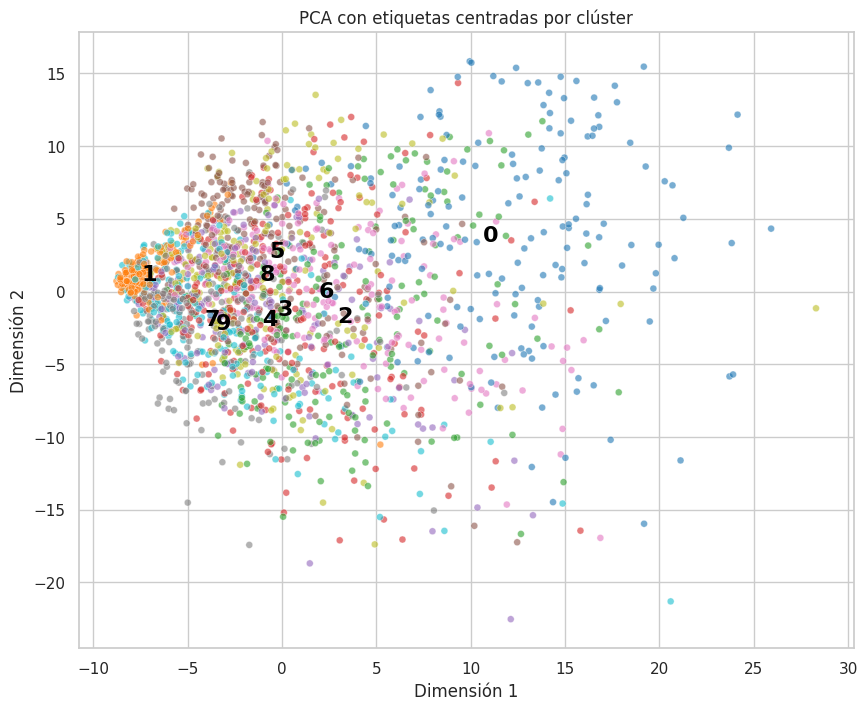

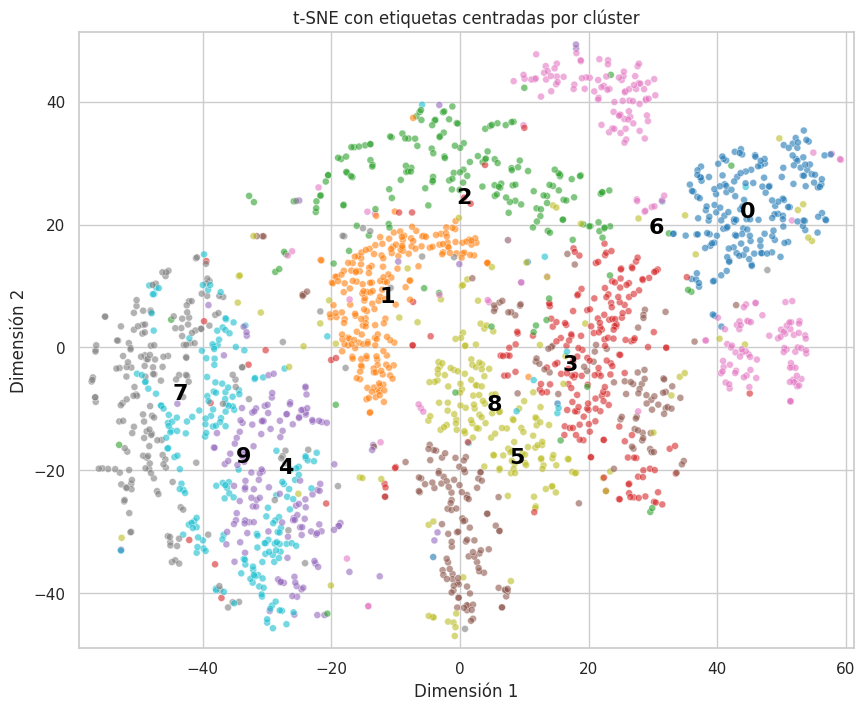

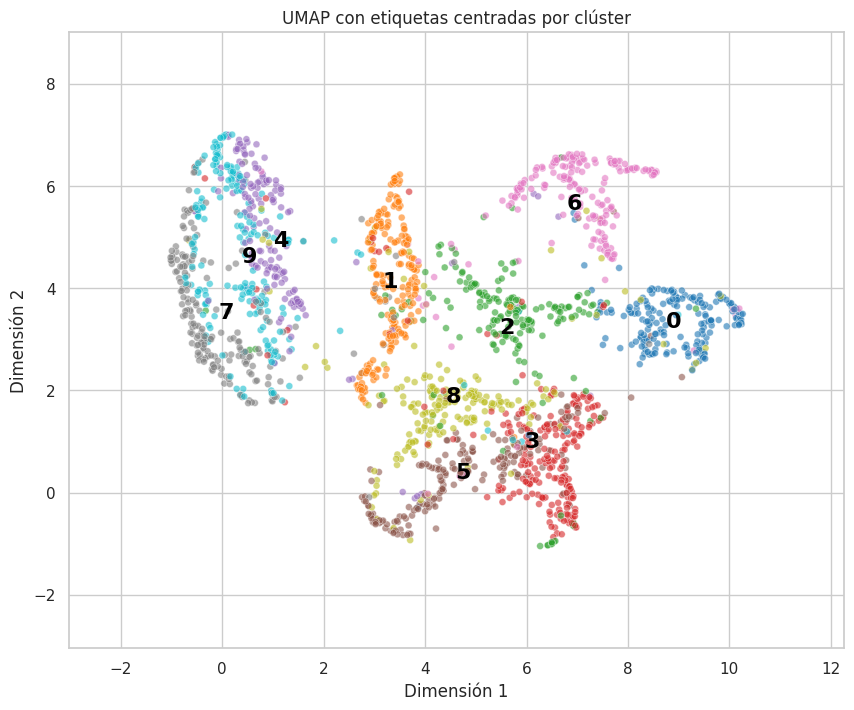

In [28]:
def plot_embedding_with_cluster_labels(X_embedded, labels, title):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    labels = np.array(labels).astype(int)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='tab10', alpha=0.6, s=25, legend=False)

    for digit in np.unique(labels):
        idx = np.where(labels == digit)
        if len(idx[0]) == 0:
            continue
        x_mean = np.mean(X_embedded[idx, 0])
        y_mean = np.mean(X_embedded[idx, 1])
        ax.text(x_mean, y_mean, str(digit), fontsize=16, weight='bold', color='black', ha='center', va='center')

    # Expandimos los ejes para no cortar texto
    buffer = 2
    ax.set_xlim(X_embedded[:, 0].min() - buffer, X_embedded[:, 0].max() + buffer)
    ax.set_ylim(X_embedded[:, 1].min() - buffer, X_embedded[:, 1].max() + buffer)

    plt.title(title)
    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.grid(True)
    plt.show()


plot_embedding_with_cluster_labels(X_pca, y_sample, "PCA con etiquetas centradas por clúster")
plot_embedding_with_cluster_labels(X_tsne, y_sample, "t-SNE con etiquetas centradas por clúster")
plot_embedding_with_cluster_labels(X_umap, y_sample, "UMAP con etiquetas centradas por clúster")

## 4. Elección de mejores hiperparámetros

Probamos diferentes combinaciones de parámetros para encontrar la configuración más informativa para cada técnica.

Perplexity = 5


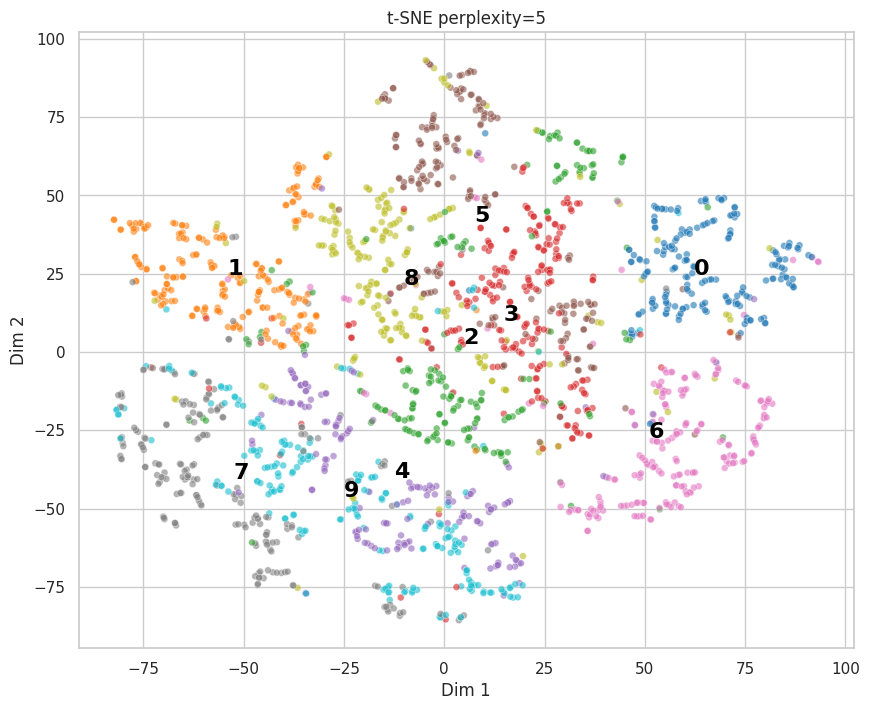

Perplexity = 10


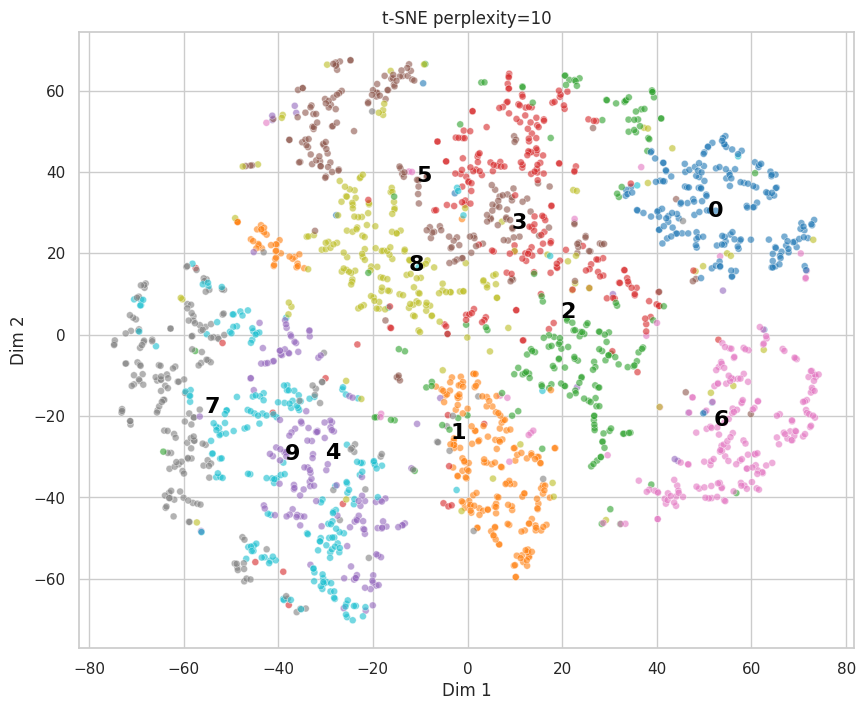

Perplexity = 30


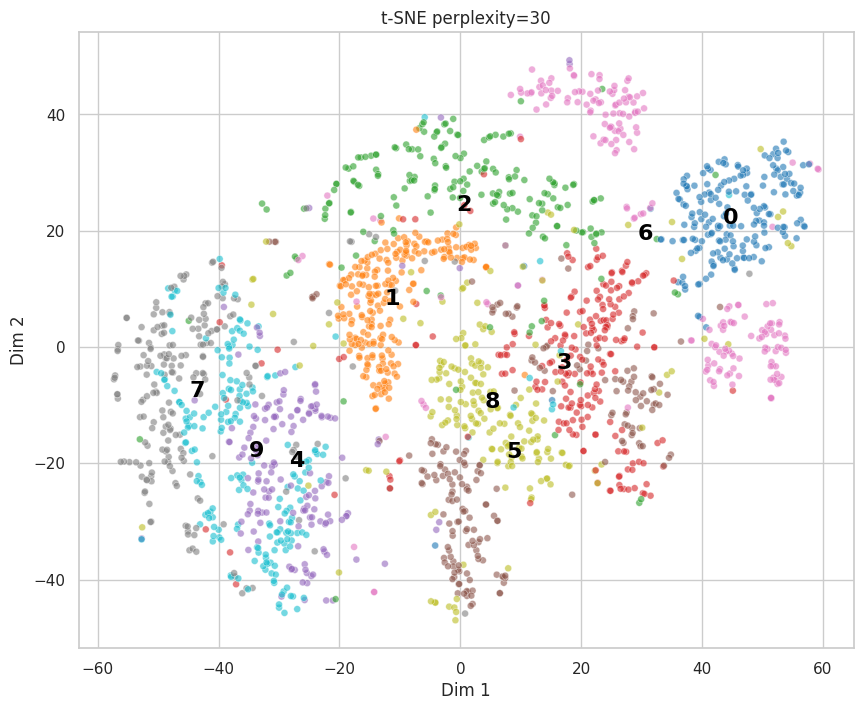

Perplexity = 50


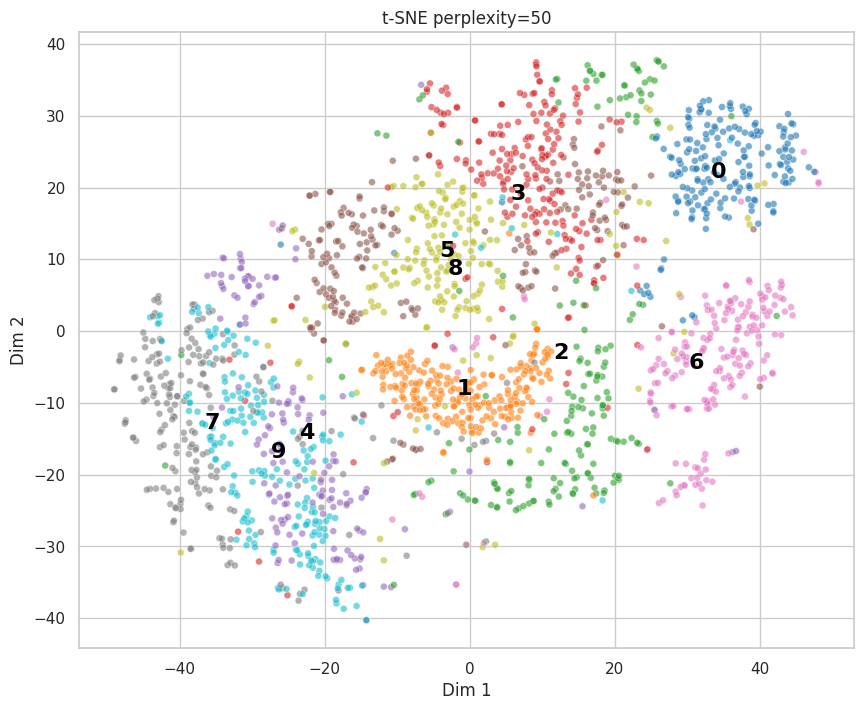

Perplexity = 100


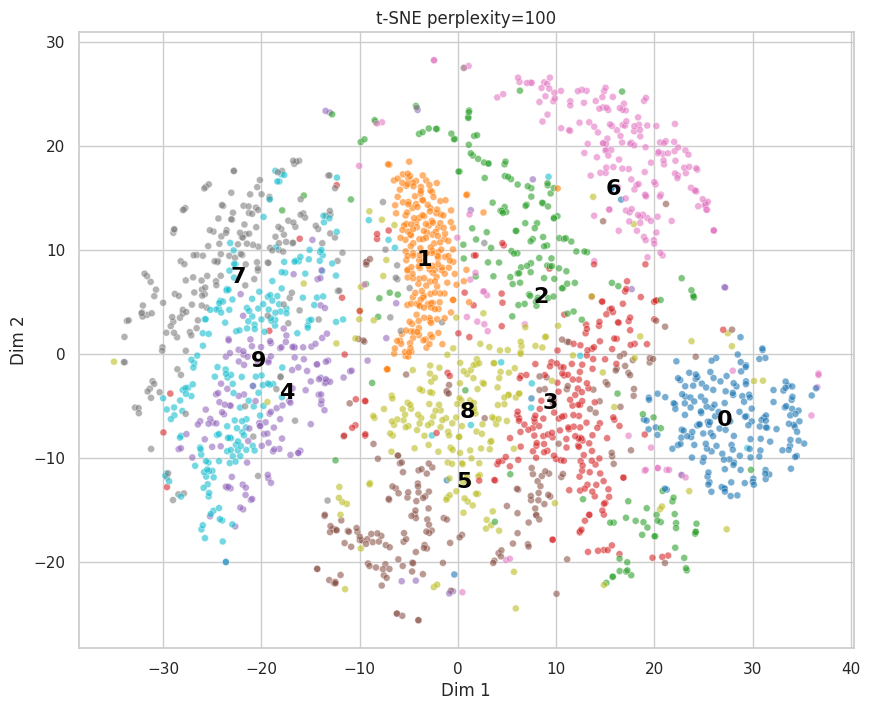

In [37]:
def plot_cluster_labels(X, labels, title):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    labels = np.array(labels).astype(int)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', alpha=0.6, s=25, legend=False)
    for d in np.unique(labels):
        idx = labels == d
        ax.text(X[idx, 0].mean(), X[idx, 1].mean(), str(d), fontsize=16, fontweight='bold',
                ha='center', va='center', color='black')
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()

for perp in [5, 10, 30, 50, 100]:
    print(f"Perplexity = {perp}")
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_emb = tsne.fit_transform(X_scaled)
    plot_cluster_labels(X_emb, y_sample, f"t-SNE perplexity={perp}")

UMAP: n_neighbors=5, min_dist=0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


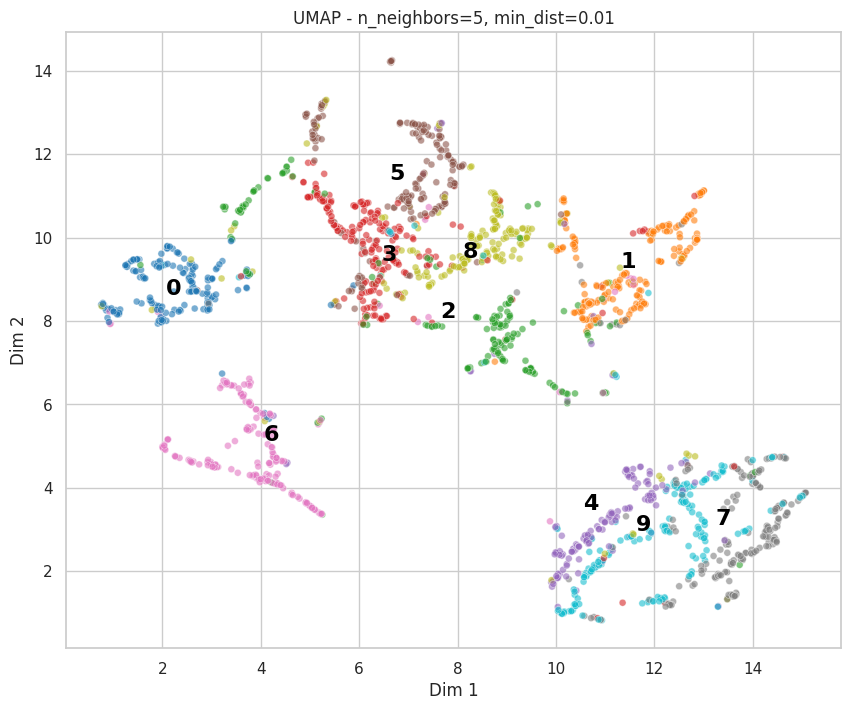

UMAP: n_neighbors=5, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


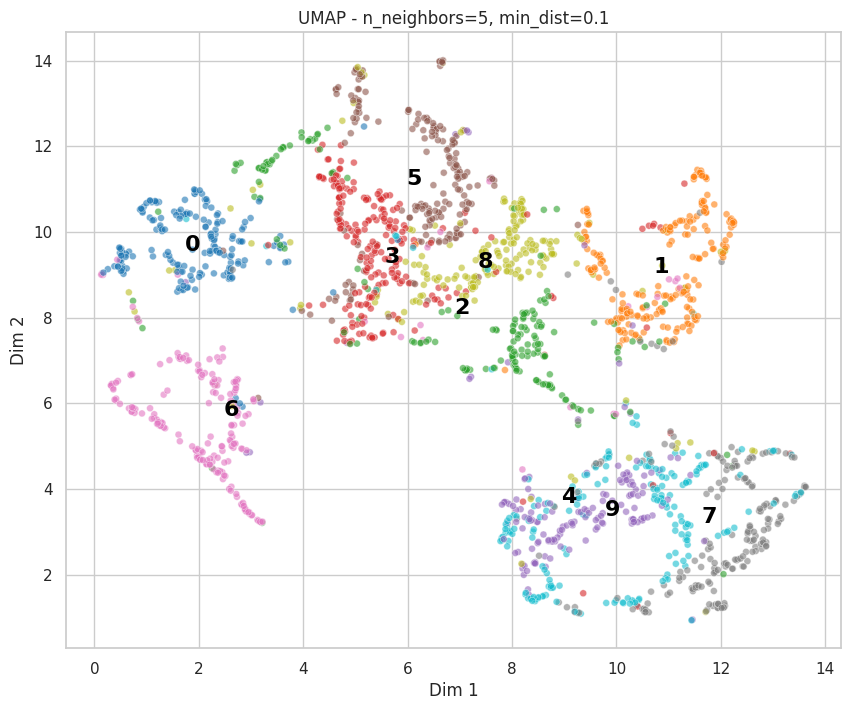

UMAP: n_neighbors=5, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


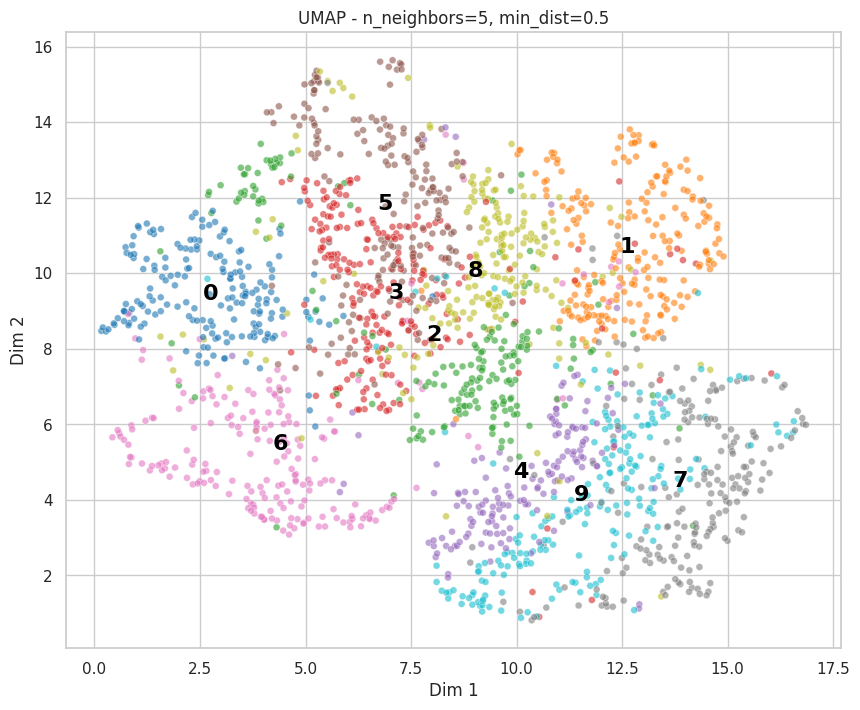

UMAP: n_neighbors=15, min_dist=0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


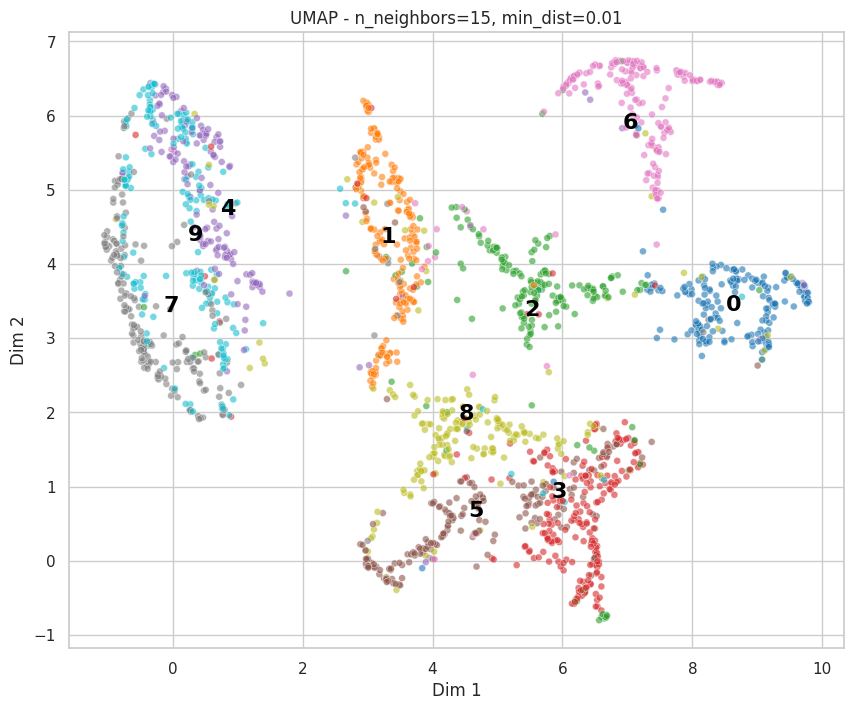

UMAP: n_neighbors=15, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


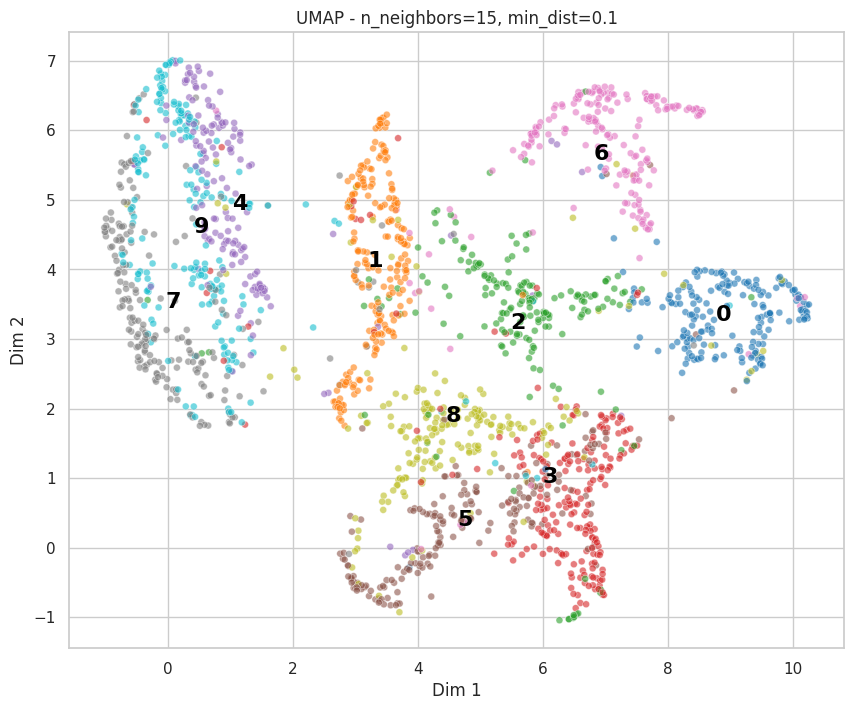

UMAP: n_neighbors=15, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


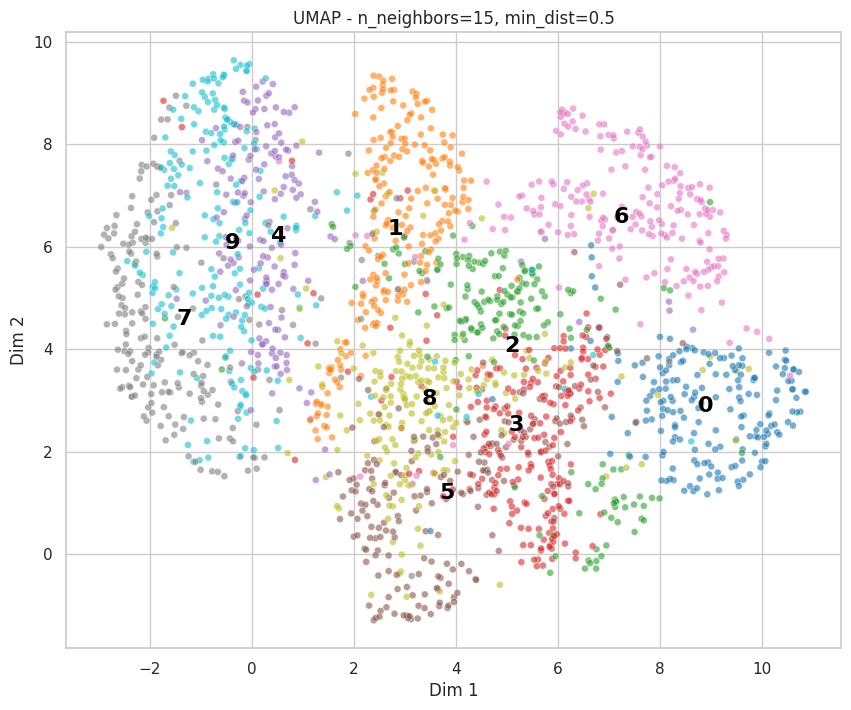

UMAP: n_neighbors=50, min_dist=0.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


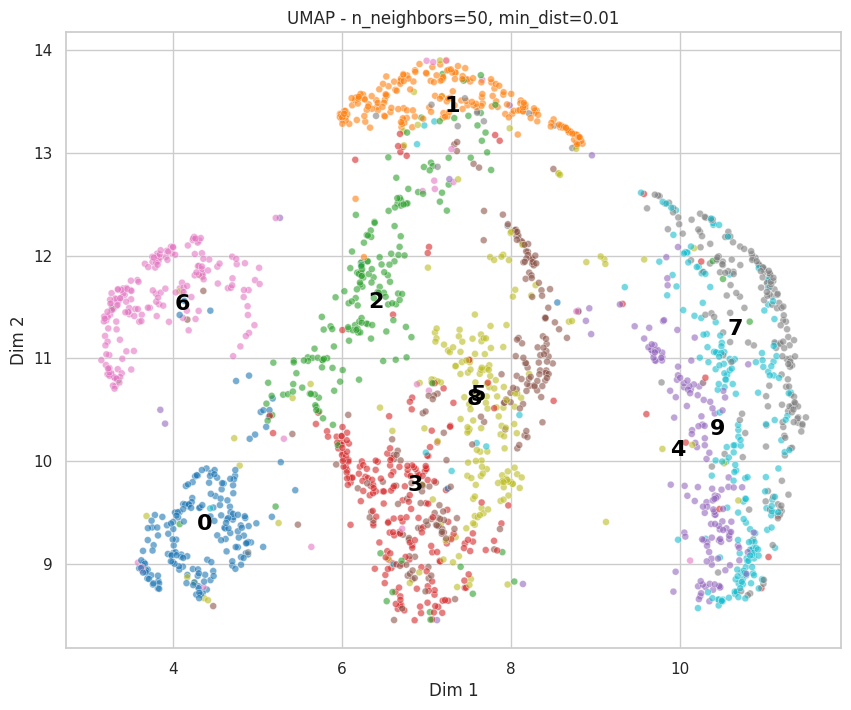

UMAP: n_neighbors=50, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


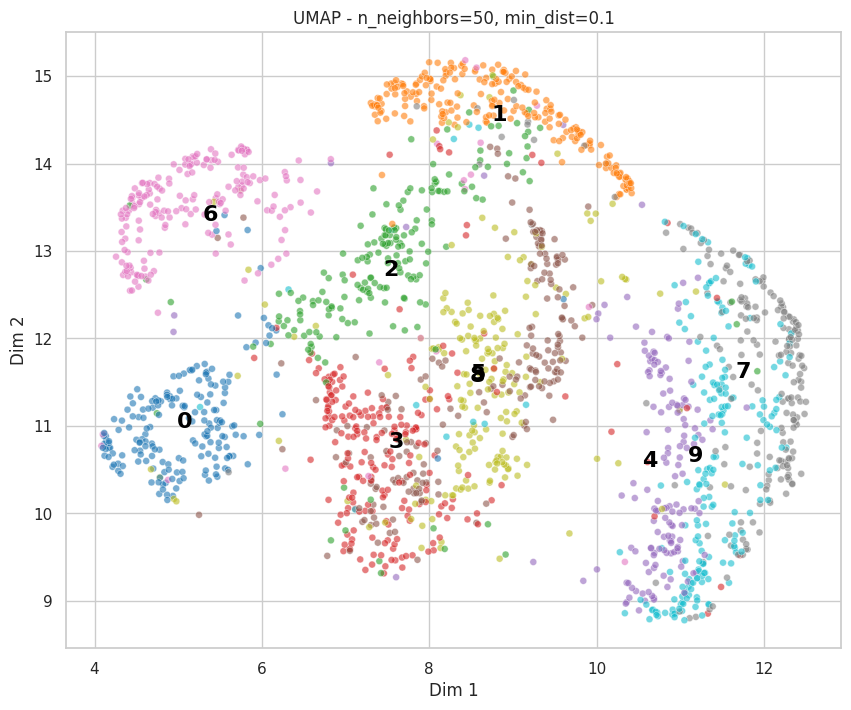

UMAP: n_neighbors=50, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


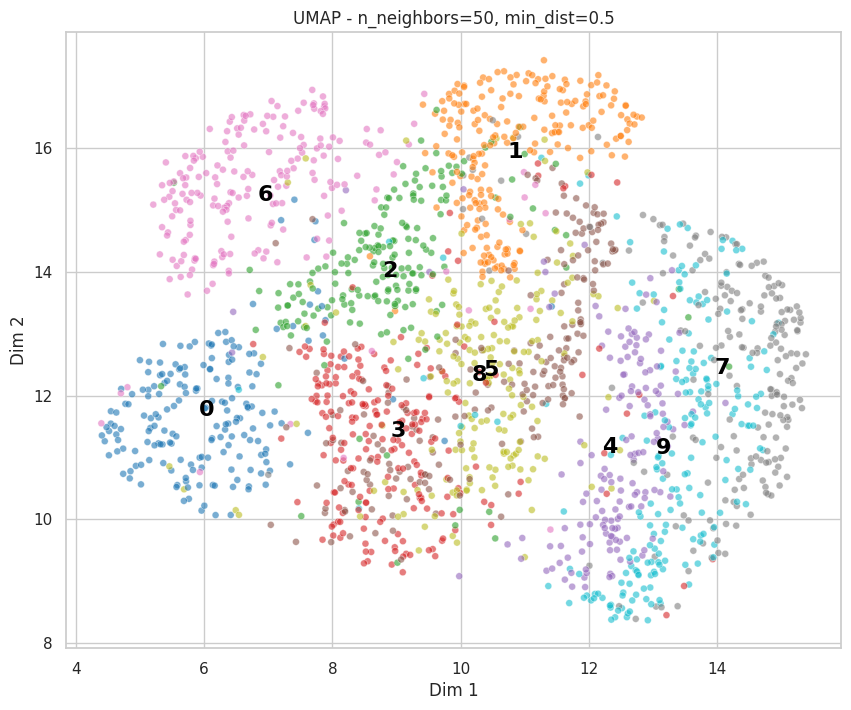

In [39]:
def plot_cluster_labels(X, labels, title):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    labels = np.array(labels).astype(int)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', alpha=0.6, s=25, legend=False)
    for d in np.unique(labels):
        idx = labels == d
        ax.text(X[idx, 0].mean(), X[idx, 1].mean(), str(d), fontsize=16, fontweight='bold',
                ha='center', va='center', color='black')
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()

for n in [5, 15, 50]:
    for d in [0.01, 0.1, 0.5]:
        print(f"UMAP: n_neighbors={n}, min_dist={d}")
        model = umap.UMAP(n_neighbors=n, min_dist=d, random_state=42)
        embedding = model.fit_transform(X_scaled)
        plot_cluster_labels(embedding, y_sample, f"UMAP - n_neighbors={n}, min_dist={d}")

## 5. Conclusión

- **PCA** es rápido pero insuficiente para separar clases no lineales como en MNIST.
- **t-SNE** logra excelente separación local, pero es más lento y no reproduce bien estructura global.
- **UMAP** es una buena combinación entre estructura local y global, con buena velocidad.

### Mejores parámetros observados:
- t-SNE: `perplexity ≈ 30` para buen balance
- PCA: usar al menos 50 componentes si se quiere preservar >90% de varianza
- UMAP: `n_neighbors=15`, `min_dist=0.1` suele dar buenos resultados por defecto